## Import all libraries 

In [83]:
import numpy as np
import pandas as pd
from numpy import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

sns.set()

## Extract the data

Extract the data from the .csv file and review the first 5 rows

In [84]:
data = pd.read_csv("real_estate_price_size_year.csv")
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


View the statistical description of the .csv file

In [85]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


Data Contains No Empty Values so No Need to Deal With it

In [86]:
data.isnull().sum()

price    0
size     0
year     0
dtype: int64

Divide data into dependent and independent variables

In [87]:
indep = data[['size', 'year']]
dep = data['price']

indep_case2 = data['size']

## Exploring the PDF's

Exploring PDF's of all variables and see if the resulting distribution is normally distributed or not, which in this case is

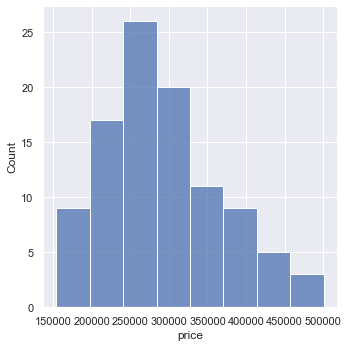

In [88]:
sns.displot(data['price'])

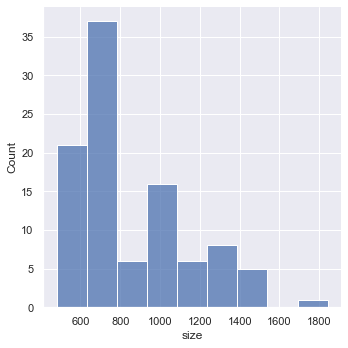

In [89]:
sns.displot(data['size'])

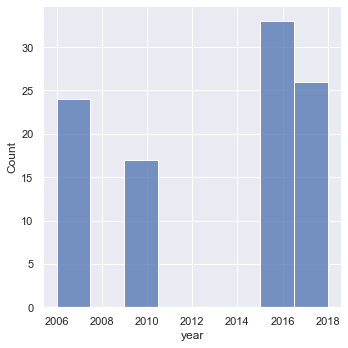

In [90]:
sns.displot(data['year'])

## Conditions for linearity

### (1) Linearity

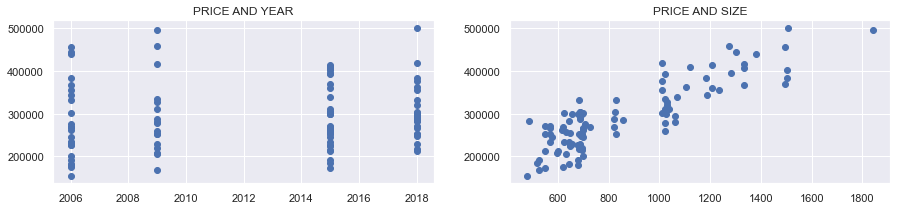

In [91]:
plt.subplot(1,2,1)
plt.scatter(data['year'], data['price'])
plt.title("PRICE AND YEAR")

plt.subplot(1,2,2)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(data['size'], data['price'])
plt.title("PRICE AND SIZE")
plt.show()

### (2) No Endogeneity

States that error and Price should NOT be co-related. In this case they are not, so this assumption is True

### (3) Normaility & Homoscedasticity

Errors should be Nomral, with 0 mean. For Homoscedasticity, we can see that there is not as the graphs are generally linearly distributed. Take Price and Year for example.


### (4) No AutoCorrelation

This assumption is true as the data we are dealing with is not time series or panel data. Thus no serial correlation exists

### (5) Multicollinearity

In [92]:
columntocheck = data[['size', 'year']]
newdf = pd.DataFrame()

newdf["VIF"] = [variance_inflation_factor(columntocheck.values, x) for x in range(columntocheck.shape[1])]
newdf.rename(index={0:'size', 1:'year'}, inplace=True)

In [93]:
newdf

,VIF
size,9.267285
year,9.267285


Since the VIF values are <10, although still very hight, we can apply the regression easily

## Scaling Data

In [94]:
Scaler = StandardScaler()
Scaler.fit(indep)
indep_scaled = Scaler.transform(indep)

In [95]:
indep_scaled

array([[-0.70816415,  0.51006137],
       [-0.66387316, -0.76509206],
       [-1.23371919,  1.14763808],
       [ 2.19844528,  0.51006137],
       [ 1.42498884, -0.76509206],
       [-0.937209  , -1.40266877],
       [-0.95171405,  0.51006137],
       [-0.78328682, -1.40266877],
       [-0.57603328,  1.14763808],
       [-0.53467702, -0.76509206],
       [ 0.69939906, -0.76509206],
       [ 3.33780001, -0.76509206],
       [-0.53467702,  0.51006137],
       [ 0.52699137,  1.14763808],
       [ 1.51100715, -1.40266877],
       [ 1.77668568, -1.40266877],
       [-0.54810263,  1.14763808],
       [-0.77276222, -1.40266877],
       [-0.58004747, -1.40266877],
       [ 0.58943055,  1.14763808],
       [-0.78365788,  0.51006137],
       [-1.02322731,  0.51006137],
       [ 1.19557293,  0.51006137],
       [-1.12884431,  0.51006137],
       [-1.10378093, -0.76509206],
       [ 0.84424715,  1.14763808],
       [-0.95171405,  1.14763808],
       [ 1.62279723,  0.51006137],
       [-0.58004747,

## Test/ Train Split

Applying 80% train and 20% test strategy

In [96]:
xtrain, xtest, ytrain, ytest = train_test_split(indep_scaled, dep, test_size = 0.2, random_state = 365)

## Regression

In [97]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [98]:
reg.intercept_

286746.4202333694

In [99]:
reg.coef_

array([64957.72126766, 10094.52651227])

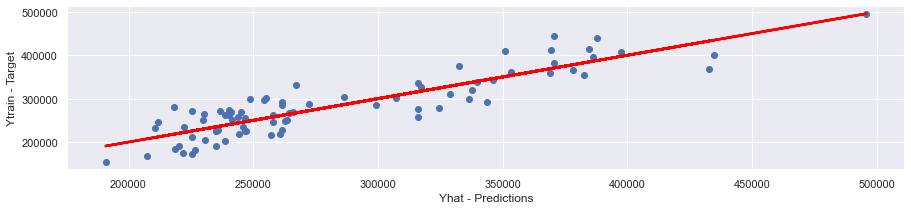

In [100]:
yhat = reg.predict(xtrain)
plt.scatter(yhat, ytrain)
plt.xlabel("Yhat - Predictions")
plt.ylabel("Ytrain - Target")
plt.plot(yhat, yhat, color = 'red', linewidth = 2.5)
plt.show()

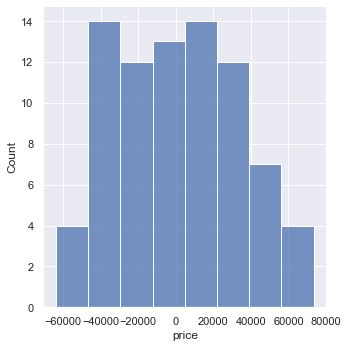

In [101]:
sns.displot(ytrain-yhat)

In [102]:
reg.score(xtrain,ytrain)

0.7928858684153612

In [103]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [104]:
adjusr2 = adj_r2(xtrain,ytrain)

In [105]:
adjusr2

0.787506280581994

In [106]:
table = pd.DataFrame()
table['Weights'] = reg.coef_
table['Intercept'] = reg.intercept_
table['R2'] = reg.score(xtrain, ytrain)
table['Adjusted R2'] = adjusr2
table.rename(index = {0:'size', 1: 'year'}, inplace = True)

In [107]:
table

,Weights,Intercept,R2,Adjusted R2
size,64957.721268,286746.420233,0.792886,0.787506
year,10094.526512,286746.420233,0.792886,0.787506


Adjusted R2 and R2 values are in range so regression is valid

## P- Value Calculation

In [108]:
f_regression(xtrain, ytrain)

(array([267.10712875,   1.06730077]), array([6.60769229e-27, 3.04748539e-01]))

In [109]:
pvals = f_regression(xtrain, ytrain)[1].round(4)

In [110]:
pvals

array([0.    , 0.3047])

In [111]:
table['P values'] = pvals

In [112]:
table

,Weights,Intercept,R2,Adjusted R2,P values
size,64957.721268,286746.420233,0.792886,0.787506,0.0000
year,10094.526512,286746.420233,0.792886,0.787506,0.3047


Since the p value of year >> 0.05 thus year is not a good variable to estimate the price of real estate, thus it should be dropped but for this example, I am testing to see the results if I don't do that. I will include another example with Year dropped as well.

## Testing the model

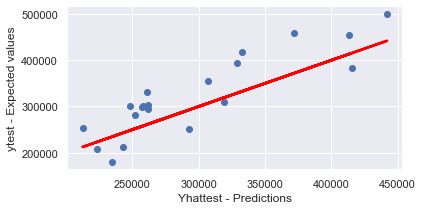

In [113]:
yhattest = reg.predict(xtest)
plt.rcParams["figure.figsize"] = (6,3)
plt.scatter(yhattest, ytest)
plt.xlabel("Yhattest - Predictions")
plt.ylabel("ytest - Expected values")
plt.plot(yhattest, yhattest, color = 'red', linewidth = 2.5)
plt.show()

In [114]:
testdf = pd.DataFrame(yhattest, columns = ['Prediction'])
testdf.head()

,Prediction
0,260913.474182
1,261619.039782
2,234908.581543
3,442033.478585
4,223120.426823


In [115]:
ytest

8     331101.344
68    294582.944
80    180307.216
55    500681.128
32    207742.248
92    298170.880
83    282683.544
60    251188.824
45    300061.480
88    211904.536
84    303597.216
66    355251.200
96    310522.592
4     458674.256
69    454512.760
35    302000.920
97    383635.568
95    252460.400
13    418753.008
51    393069.760
Name: price, dtype: float64

In [116]:
ytest.reset_index(drop = True, inplace = True)

In [117]:
ytest

0     331101.344
1     294582.944
2     180307.216
3     500681.128
4     207742.248
5     298170.880
6     282683.544
7     251188.824
8     300061.480
9     211904.536
10    303597.216
11    355251.200
12    310522.592
13    458674.256
14    454512.760
15    302000.920
16    383635.568
17    252460.400
18    418753.008
19    393069.760
Name: price, dtype: float64

In [118]:
testdf['Expected- Target'] = ytest
testdf.head(10)

,Prediction,Expected- Target
0,260913.474182,331101.344
1,261619.039782,294582.944
2,234908.581543,180307.216
3,442033.478585,500681.128
4,223120.426823,207742.248
5,257163.847305,298170.880
6,252330.553506,282683.544
7,292883.045962,251188.824
8,257989.928769,300061.480
9,243252.422190,211904.536


In [119]:
testdf['Difference'] = testdf['Expected- Target'] - testdf['Prediction']

In [120]:
testdf

,Prediction,Expected- Target,Difference
0,260913.474182,331101.344,70187.869818
1,261619.039782,294582.944,32963.904218
2,234908.581543,180307.216,-54601.365543
3,442033.478585,500681.128,58647.649415
4,223120.426823,207742.248,-15378.178823
5,257163.847305,298170.880,41007.032695
6,252330.553506,282683.544,30352.990494
7,292883.045962,251188.824,-41694.221962
8,257989.928769,300061.480,42071.551231
9,243252.422190,211904.536,-31347.886190


In [121]:
testdf['% Difference'] = np.absolute((testdf['Expected- Target'] - testdf['Prediction'])*100/(testdf['Expected- Target']))

In [122]:
testdf

,Prediction,Expected- Target,Difference,% Difference
0,260913.474182,331101.344,70187.869818,21.198304
1,261619.039782,294582.944,32963.904218,11.190025
2,234908.581543,180307.216,-54601.365543,30.282407
3,442033.478585,500681.128,58647.649415,11.713573
4,223120.426823,207742.248,-15378.178823,7.402528
5,257163.847305,298170.880,41007.032695,13.752863
6,252330.553506,282683.544,30352.990494,10.737445
7,292883.045962,251188.824,-41694.221962,16.598757
8,257989.928769,300061.480,42071.551231,14.020977
9,243252.422190,211904.536,-31347.886190,14.793400


In [123]:
testdf.describe()

,Prediction,Expected- Target,Difference,% Difference
count,20.000000,20.00000,20.000000,20.000000
mean,296829.841567,324545.09120,27715.249633,14.445211
std,67957.592597,87886.28552,42870.102091,5.900370
min,212580.766764,180307.21600,-54601.365543,2.869270
25%,251228.381154,275127.75800,-10526.842587,11.076880
50%,261619.039782,302799.06800,40982.534373,13.923954
75%,329823.531167,385994.11600,55221.204278,16.925797
max,442033.478585,500681.12800,87087.050180,30.282407


## Predicting Values Simulator

In [124]:
print("WELCOME TO OUR ML TRAINED PRICE PREDICTOR")
flag = True

while flag == True:
    size = int(input("Enter size of house in yards: "))
    year = int(input("Enter the year the house was made: "))
    new_data = [[size, year]]
    new_data_scaled = Scaler.transform(new_data)
    val = reg.predict(new_data_scaled)
    print("Our Machine Learning model predicted the house to cost {} pounds".format(val[0].round(3)))
    
    choice = input("Do you want to predict further values? Enter Y/N: ")
    
    while choice!= "Y" and choice != "N":
        choice = input("Wrong choice. Try again: ")
    if choice == 'N':
        flag = False
        print("Thank you for using our simulator! ")

WELCOME TO OUR ML TRAINED PRICE PREDICTOR
Enter size of house in yards: 2000
Enter the year the house was made: 2015


D:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Our Machine Learning model predicted the house to cost 543220.301 pounds
Do you want to predict further values? Enter Y/N: Y
Enter size of house in yards: 1500
Enter the year the house was made: 2015


D:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Our Machine Learning model predicted the house to cost 433660.425 pounds
Do you want to predict further values? Enter Y/N: Y
Enter size of house in yards: 1000
Enter the year the house was made: 2015


D:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Our Machine Learning model predicted the house to cost 324100.549 pounds
Do you want to predict further values? Enter Y/N: Y
Enter size of house in yards: 50000
Enter the year the house was made: 2015


D:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Our Machine Learning model predicted the house to cost 11060968.385 pounds
Do you want to predict further values? Enter Y/N: N
Thank you for using our simulator! 
